<a href="https://colab.research.google.com/github/Lakshmihasa/Lakshmihasa_Meta_Scifor/blob/main/mini%20project%201/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install Dependencies
!pip install opencv-python matplotlib tensorflow

import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# 2. GPU Memory Growth (if applicable)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
# 3. Remove Dodgy Images
data_dir = '/content/data'  # Make sure this path is correct for your dataset location
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /content/data/tomato/img_p3_46.jpeg
Issue with image /content/data/tomato/img_p3_30.jpeg
Issue with image /content/data/tomato/img_p3_86.jpeg
Issue with image /content/data/tomato/img_p1_10.jpeg
Issue with image /content/data/tomato/img_p3_79.jpeg
Issue with image /content/data/tomato/img_p1_99.jpeg
Issue with image /content/data/tomato/img_p3_5.jpeg
Issue with image /content/data/tomato/img_p1_37.jpeg
Issue with image /content/data/tomato/img_p3_20.jpeg
Issue with image /content/data/tomato/img_p2_39.jpeg
Issue with image /content/data/tomato/img_p3_26.jpeg
Issue with image /content/data/tomato/img_p3_96.jpeg
Issue with image /content/data/tomato/img_p3_122.jpeg
Issue with image /content/data/tomato/img_p1_18.jpeg
Issue with image /content/data/tomato/img_p2_105.jpeg
Issue with image /content/data/tomato/img_p3_58.jpeg
Issue with image /content/data/tomato/img_p2_30.jpeg
Issue with image /content/data/tomato/img_p3_50.jpeg
Issue with image /content/data/tomato/img_p3_

Found 294 files belonging to 2 classes.


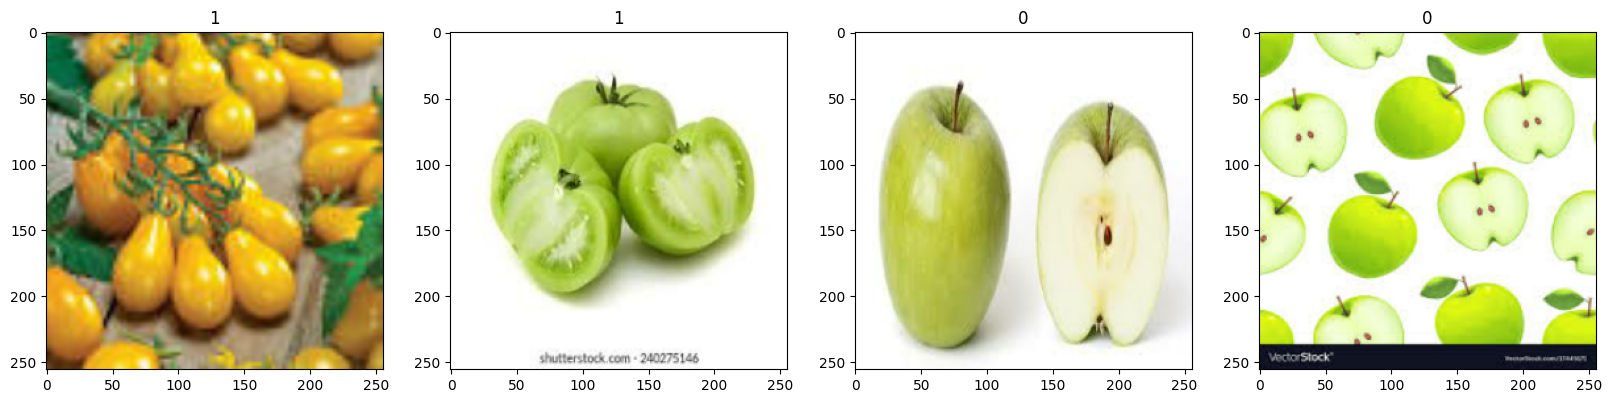

In [ ]:
# 4. Load Data
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32
)

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()


In [ ]:
# 5. Scale Data
data = data.map(lambda x, y: (x / 255.0, y))
data.as_numpy_iterator().next()

# 6. Split Data
data_size = len(data)
train_size = int(data_size * 0.7)
val_size = int(data_size * 0.2)
test_size = int(data_size * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
# 7. Build Deep Learning Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Adjusted for binary classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
# 8. Train
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 24s 2s/step - loss: 0.9948 - accuracy: 0.5759 - val_loss: 0.5842 - val_accuracy: 0.7812
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.6016 - accuracy: 0.6696 - val_loss: 0.5542 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.6153 - accuracy: 0.6429 - val_loss: 0.5458 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.5288 - accuracy: 0.6875 - val_loss: 0.4367 - val_accuracy: 0.7969
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.4391 - accuracy: 0.8259 - val_loss: 0.3872 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 18s 3s/step - loss: 0.3831 - accuracy: 0.8259 - val_loss: 0.2801 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.3070 - accuracy: 0.8750 - val_loss: 0.2815 - val_accuracy: 0.8906
Epoch 8/20
7/7 [==================

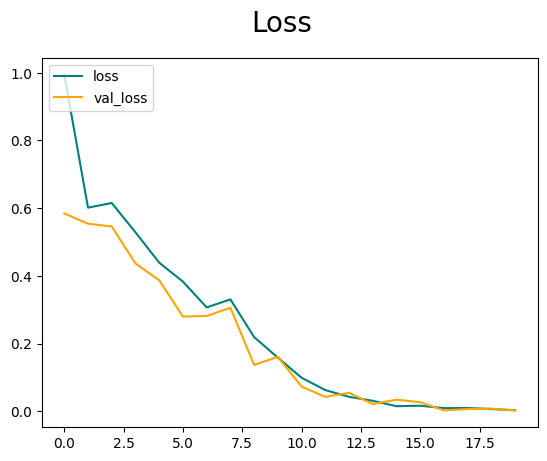

In [ ]:
# 9. Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

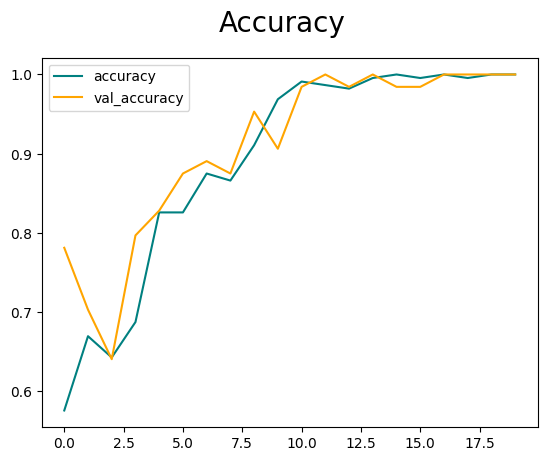

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# 10. Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

acc = BinaryAccuracy()
pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.argmax(yhat, axis=1)
    acc.update_state(y, yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

print(f'Accuracy: {acc.result().numpy()}')
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')

1/1 [==============================] - 0s 410ms/step
Accuracy: 1.0
Precision: 0.0
Recall: 0.0


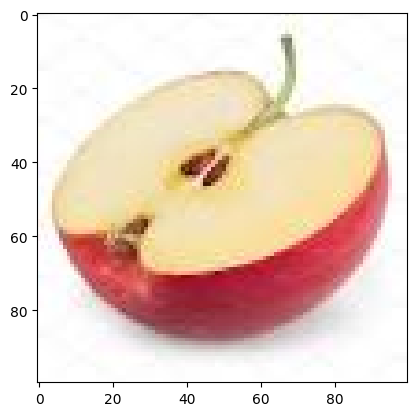

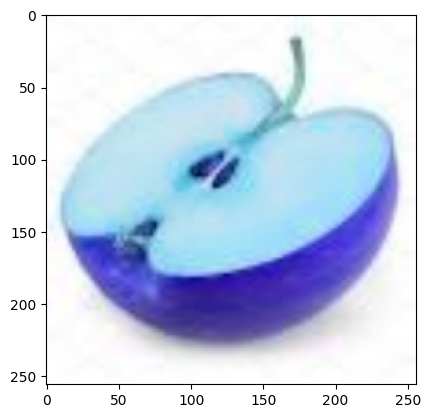

1/1 [==============================] - 0s 42ms/step
[[0.39792034 0.6020797 ]]
Predicted class is Apple


In [ ]:
# 11. Test
class_names = ['Tomato', 'Apple']

img_path = '/content/data/apple/img_p1_20.jpeg'  # Replace with your test image path
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize / 255.0, 0))
predicted_class = np.argmax(yhat)
print(yhat)
print(f'Predicted class is {class_names[predicted_class]}')

In [ ]:
# 12. Save the Model
model.save(os.path.join('models', 'apple_tomato_classifier.h5'))
new_model = tf.keras.models.load_model('models/apple_tomato_classifier.h5')
new_model.predict(np.expand_dims(resize / 255.0, 0))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 146ms/step


array([[0.39792034, 0.6020797 ]], dtype=float32)